In [1]:
using PyPlot
include("lib/all.jl");

In [2]:
N=2^20
ax = zeros(N)
ay = zeros(N)
az = zeros(N);

particles = make_particles(N);
t = DTree(particles, 12);

In [3]:
@time fill!(t.tree.nodes, Node());

  0.021034 seconds (4.74 k allocations: 210.922 KB)


In [4]:
@time fill!(t.tree.exps, NodeExp());

  0.016307 seconds (4.66 k allocations: 211.328 KB)


In [5]:
@time group!(t);

  0.125174 seconds (110.47 k allocations: 4.571 MB)


In [6]:
@time inform!(t);

  0.256154 seconds (885.65 k allocations: 17.547 MB)


In [7]:
fill!(ax,0.0)
fill!(ay,0.0)
fill!(az,0.0);

In [8]:
@time interact!(t, 0.3, ax, ay, az, 1.0e-3);

In [9]:
ts=Float64[]
for i in 1:12
    tic()
    interact!(t, 0.3, ax, ay, az, 1.0e-3);
    append!(ts, toq())
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 

In [10]:
mean(ts)

0.320208438

In [9]:
@time collect!(t)

  0.038137 seconds (21.08 k allocations: 861.783 KB)


In [10]:
@time accel!(t, ax,ay,az)

  0.091911 seconds (71.66 k allocations: 2.595 MB)


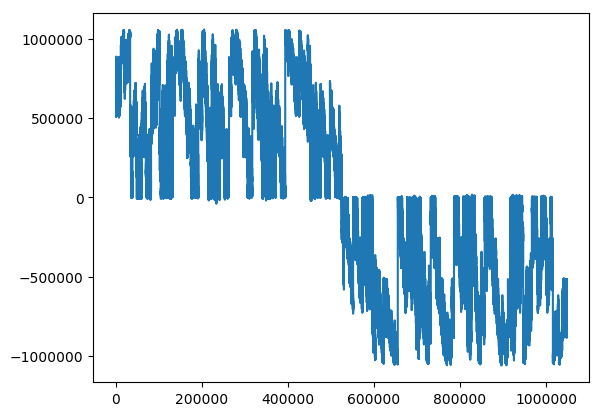

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f369fc62860>

In [18]:
plot(ax)

In [19]:
mean(abs(ax))/1e5

5.17039807029092

In [20]:
mx,myd,e50,e90,e95,e99,m,s,mee = perf(particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

mean(abs(rax)) = 518260.96671514626
[0.0,0.0,0.0,0.0,0.0,3.0,6.0,14.0,27.0,68.0,150.0,341.0,628.0,1107.0,1725.0,1994.0,1765.0,1143.0,575.0,288.0,103.0,37.0,21.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [ ]:
semilogx(10.^mx,myd,"-k")

In [ ]:
mee

In [ ]:
e50

In [ ]:
e90

In [ ]:
e99

In [20]:
e50

0.5498493611557039

In [21]:
e90

1.1468925642330627

In [22]:
e99

2.3842028589730466

In [13]:
function doall(t, ax,ay,az, alpha, eps2)
    total_mass = t.trees[1].total_mass
    for it in t.trees
        fill!(it.exps, NodeExp());
        it.total_mass = total_mass
    end
    tic()
    group!(t)
    t_group = toq()
    tic()
    inform!(t)
    t_inf = toq()
    fill!(ax,0.0)
    fill!(ay,0.0)
    fill!(az,0.0)
    tic()
    interact!(t, alpha, ax, ay, az, eps2)
    t_int = toq()
    tic()
    collect!(t)
    t_coll = toq()
    tic()
    accel!(t,ax,ay,az)
    t_acc = toq()
    t_group, t_inf, t_int, t_coll, t_acc
end

doall (generic function with 1 method)

In [16]:
s_g = Float64[]
s_inf = Float64[]
s_int = Float64[]
s_coll = Float64[]
s_acc = Float64[]
s_all = Float64[]
for i in 1:20
    tic()
    t_group, t_inf, t_int, t_coll, t_acc = doall(t, ax, ay, az, 0.26, 1.0e-3);
    t_all = toq()
    append!(s_g, t_group)
    append!(s_inf, t_inf)
    append!(s_int, t_int)
    append!(s_coll, t_coll)
    append!(s_acc, t_acc)
    append!(s_all, t_all)
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20


In [17]:
@show mean(s_g)
@show mean(s_inf)
@show mean(s_int)
@show mean(s_coll)
@show mean(s_acc)
@show mean(s_all);

mean(s_g) = 0.04179500540000001
mean(s_inf) = 0.031214232899999993
mean(s_int) = 0.37203674379999996
mean(s_coll) = 0.00783732645
mean(s_acc) = 0.007104206750000001
mean(s_all) = 0.46977598759999994
